# Ford GoBike System Data Exploration By Tijani Abdul-hakeem

INTRODUCTION

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [65]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [69]:
import seaborn as sns

What is the structure of the dataset?

The dataset is made up of 183412 rows and 16 columns. The dataset also contains both categorical and numerical type of data.

 1   duration_sec             183412 non-null  int64 
 
 2   start_time               183412 non-null  object 
 
 3   end_time                 183412 non-null  object 
 
 4   start_station_id         183215 non-null  float64
 
 5   start_station_name       183215 non-null  object 
 
 6   start_station_latitude   183412 non-null  float64
 
 7   start_station_longitude  183412 non-null  float64
 
 8   end_station_id           183215 non-null  float64
 
 9   end_station_name         183215 non-null  object 
 
 10   end_station_latitude     183412 non-null  float64
 
 11  end_station_longitude    183412 non-null  float64
 
 12  bike_id                  183412 non-null  int64  
 
 13  user_type                183412 non-null  object 
 
 14  member_birth_year        175147 non-null  float64
 
 15  member_gender            175147 non-null  object 
 
 16  bike_share_for_all_trip  183412 non-null  object 

What are the main features of interest in the dataset?
The features of interest in the dataset include the age range, gender of the users, popular stations and least popular stations amongst users, the distance travelled by users and time spent by users.

What features in the dataset do you think will help support the investigation into your features of interest?
The birth year would help in figuring out the age of users, the start and end station longitude and latitude provided would help to figure out the distance travelled by the users, the start and end station name would help to create insight into the most used station and least used station by the users to help figure out the stations that require more attention.


# Data wrangling

In [70]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [71]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [73]:
df.shape

(183412, 16)

In [74]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [75]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


A copy of the dataset is made before any changes are made to the dataset.

In [76]:
df1 = df.copy()

A function is created to discover the distance travelled by users and the distance was gotten from the start_station_latitude, end_station_latitude, start_station_longitude, end_station_longitude columns.


In [77]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [78]:
import geopy.distance
def distance_km(df, lat1, lat2, lon1, lon2):
    distance = []
    for lat1,lat2, lon1, lon2 in zip(df[lat1],df[lat2], df[lon1], df[lon2]):
        coords_1 = (lat1, lon1)
        coords_2 = (lat2, lon2)
        calc_dist = geopy.distance.geodesic(coords_1, coords_2).km
        distance.append(calc_dist)
    df['distance_km'] = distance
distance_km(df1, 'start_station_latitude', 'end_station_latitude', 'start_station_longitude','end_station_longitude')

The start_station_latitude, end_station_latitude, start_station_longitude, end_station_longitude columns were dropped as they were no longer needed for analysis.


In [79]:
not_needed = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df1.drop(not_needed, axis = 1, inplace = True)


In [80]:
df1.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.543983
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,1.739909
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.705390
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260896
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.412017
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.328256
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,2.029323
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,4.526203
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,4.526203
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,No,3.660261


In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
 12  distance_km              183412 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 18.2+ MB


The start_station_id and end_station_id columns were filled with 0 in place of Nan and the member_birth_year column was filled with the mean of the column in place of the Nan values.


In [82]:
df1['start_station_id'] = df1['start_station_id'].fillna(0)
df1['end_station_id'] = df1['end_station_id'].fillna(0)
df1['member_birth_year'] = df1['member_birth_year'].fillna(df1['member_birth_year'].mean())

The start_station_id, end_station_id  and member_birth_year were changed from float to int

In [83]:
df1 = df1.astype({"start_station_id":"int","end_station_id":"int", "member_birth_year" : "int"})

In [84]:
df1.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
end_station_id               int64
end_station_name            object
bike_id                      int64
user_type                   object
member_birth_year            int64
member_gender               object
bike_share_for_all_trip     object
distance_km                float64
dtype: object

In [85]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,0.543983
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,1984,NaN,No,1.739909
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2.705390
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,0.260896
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2.412017


Creating a duration in minutes column form the duration_sec column

In [86]:
minutes=df1['duration_sec']/60
minutes[:5]

0     869.750000
1     708.683333
2    1030.900000
3     608.166667
4      26.416667
Name: duration_sec, dtype: float64

In [87]:
minutes = minutes.astype('int')
minutes.dtype

dtype('int64')

Dropping the start_time and end_time columns as they are not needed for the analysis

In [88]:
un_needed = ['start_time', 'end_time']
df1.drop(un_needed, axis = 1, inplace = True)

In [89]:
df1['duration_in_mins'] = minutes
df1.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,duration_in_mins
0,52185,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,0.543983,869
1,42521,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,1984,NaN,No,1.739909,708
2,61854,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2.705390,1030
3,36490,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,0.260896,608
4,1585,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2.412017,26


Getting the age of the users from the member_birth_year column

In [90]:
df1['age'] =2022 - df1['member_birth_year'].astype('int64')

df1.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,duration_in_mins,age
0,52185,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,0.543983,869,38
1,42521,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,1984,NaN,No,1.739909,708,38
2,61854,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2.705390,1030,50
3,36490,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,0.260896,608,33
4,1585,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2.412017,26,48


# Univarate exploration

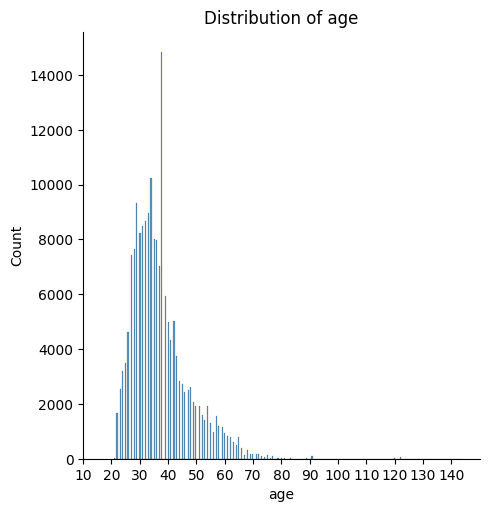

In [91]:
sns.displot(df1['age'])
plt.xticks([10, 20, 30, 40 ,50, 60, 70, 80, 90, 100, 110, 120, 130, 140])
plt.title('Distribution of age')
plt.show()

The distribution of the age of users is right skewed. People in their late twenties and thirties are the major users of the bike sharing system. Most of the users are young while the bike sharing system is unpopular amongst the older generations.

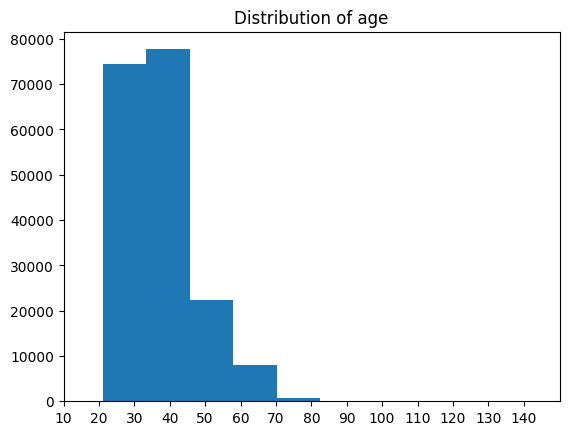

In [92]:
plt.hist(df1['age'], bins=10)
plt.title('Distribution of age')
plt.xticks([10, 20, 30, 40 ,50, 60, 70, 80, 90, 100, 110, 120, 130, 140])
plt.show()

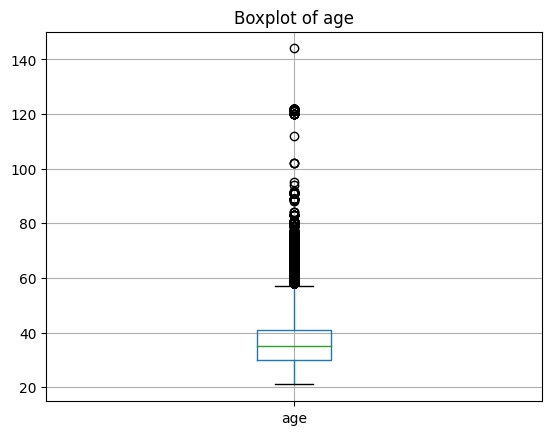

In [93]:
df1.boxplot('age')
plt.title('Boxplot of age')
plt.show()

In [94]:
#function for top ten values.
def top_ten(df, column):
    total_count = df[column].value_counts()[:10]
    new_dict = dict(total_count)
    list_keys=list(new_dict.keys())
    list_values=list(new_dict.values())
    columns=['station_name','value_counts']
    df_x = pd.DataFrame([[x,y] for x, y in zip(list_keys, list_values)], columns=columns)
    sns.barplot(y='station_name', x='value_counts', data=df_x)

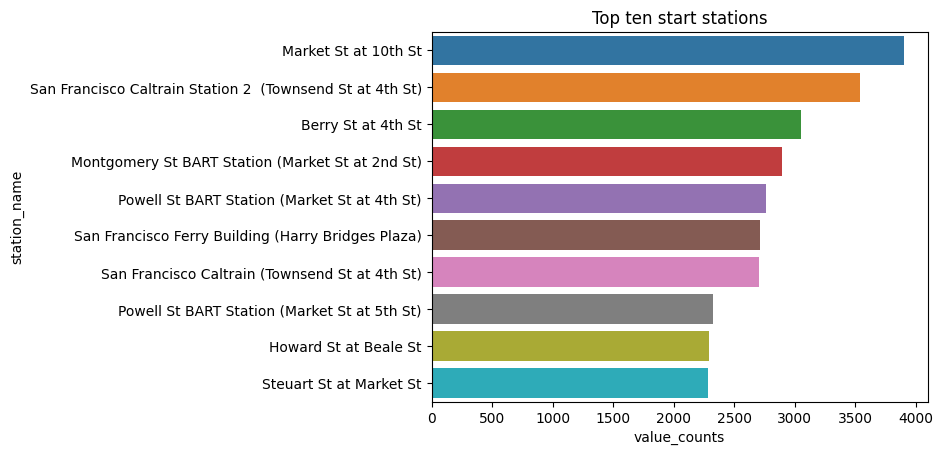

In [95]:
top_ten(df1, 'start_station_name')
plt.title('Top ten start stations')
plt.show()

This shows the stations where the bike sharing system i mostly used and shows the are area where majority of the users are  located.

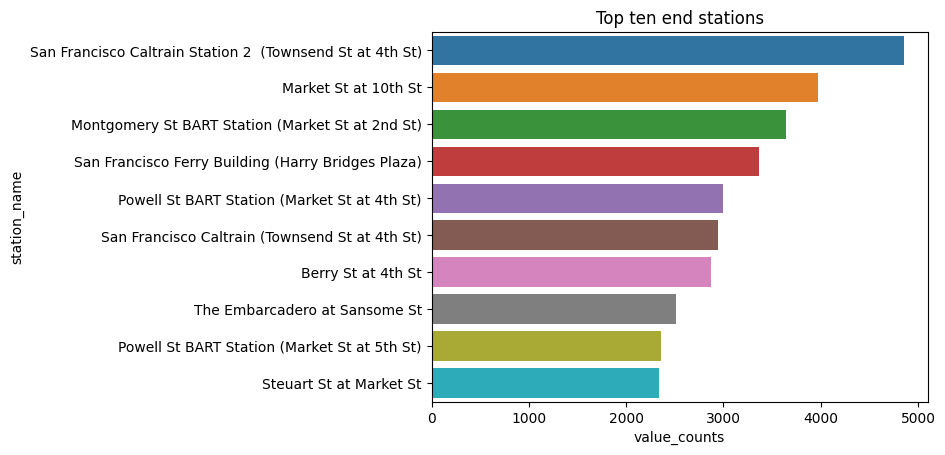

In [96]:
top_ten(df1, 'end_station_name')
plt.title('Top ten end stations')
plt.show()

This shows the stations where the users frequently visit

In [97]:
#function for last ten values.
def last_ten(df, column):
    total_count = df[column].value_counts()[-10:]
    new_dict = dict(total_count)
    list_keys=list(new_dict.keys())
    list_values=list(new_dict.values())
    columns=['station_name','value_counts']
    df_x = pd.DataFrame([[x,y] for x, y in zip(list_keys, list_values)], columns=columns)
    sns.barplot(y='station_name', x='value_counts', data=df_x)

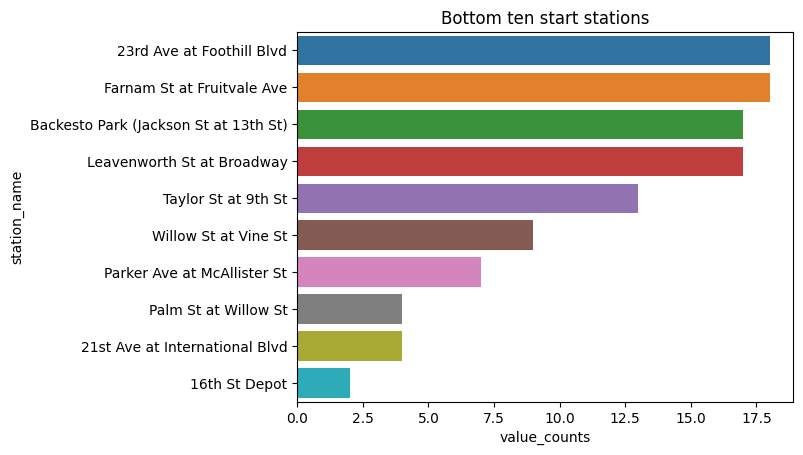

In [98]:
last_ten(df1, 'start_station_name')
plt.title('Bottom ten start stations')
plt.show()

This shows the least used station by users and this are areas where advertisement can be targeted towards or where the bike sharing system can cancelled.

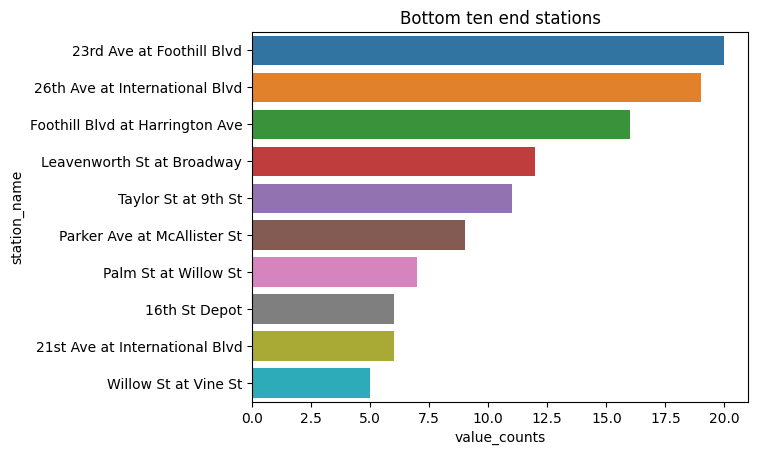

In [99]:
last_ten(df1, 'end_station_name')
plt.title('Bottom ten end stations')
plt.show()

This shows the stations that are least visited by the users.

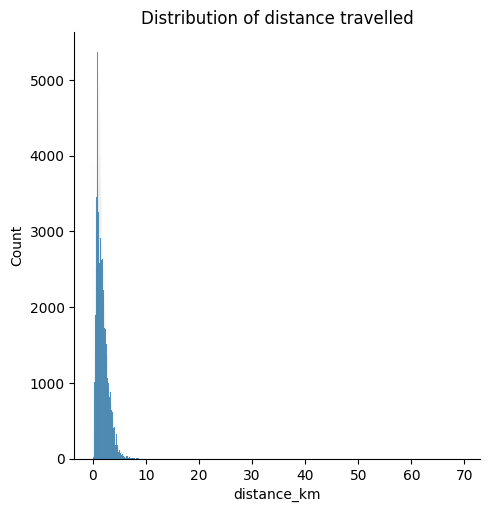

In [100]:
sns.displot(df1['distance_km'])
plt.title('Distribution of distance travelled')
plt.show()

The distribution of distance travelled is right skewed. The distance majorly covered by the users between 2 to 4 kilometers

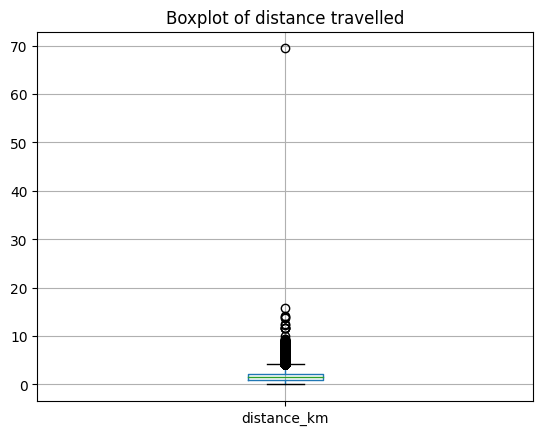

In [101]:
df1.boxplot('distance_km')
plt.title('Boxplot of distance travelled')
plt.show()

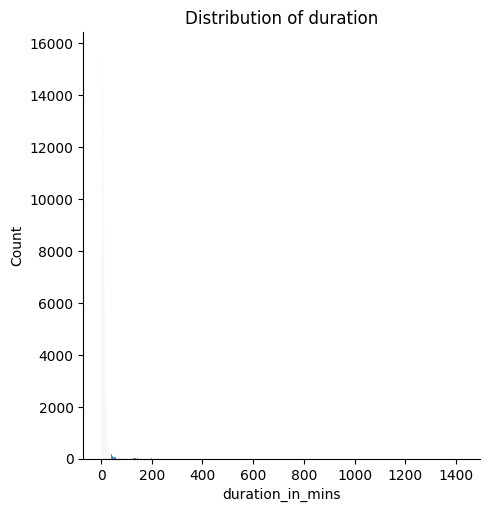

In [102]:
sns.displot(df1['duration_in_mins'])
plt.title('Distribution of duration')
plt.show()

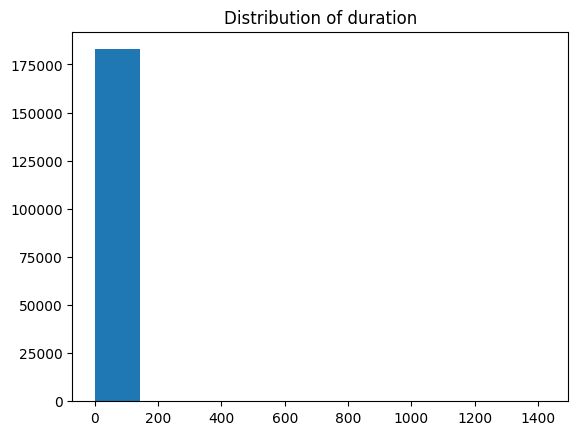

In [103]:
plt.hist(data = df1, x = 'duration_in_mins', bins = 10)
plt.title('Distribution of duration')
plt.show()

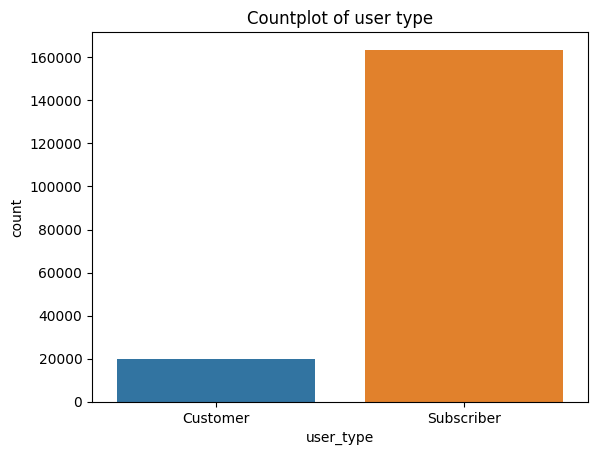

In [104]:
sns.countplot(data = df1, x = 'user_type')
plt.title('Countplot of user type')
plt.show()

This shows that there a more subscribers than customers in the bike sharing system.

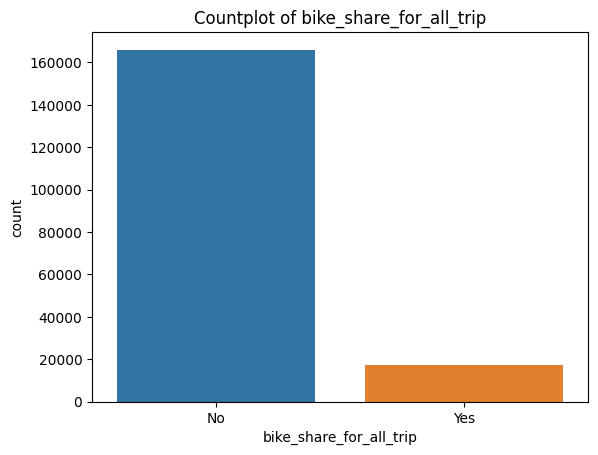

In [105]:
sns.countplot(data = df1, x = 'bike_share_for_all_trip')
plt.title('Countplot of bike_share_for_all_trip')
plt.show()

This shows that majority of the users do not share bike for trips.

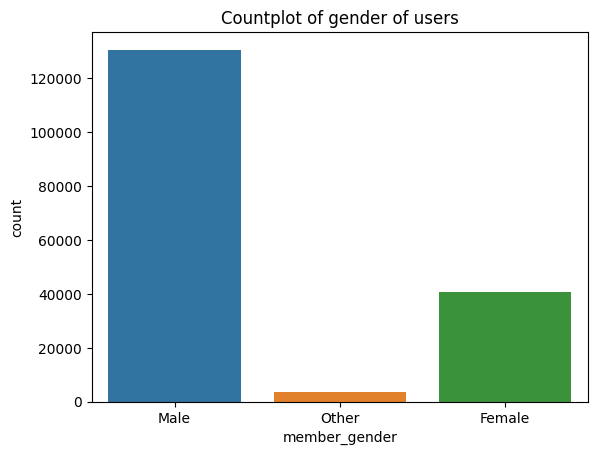

In [106]:
sns.countplot(data = df1, x = 'member_gender')
plt.title('Countplot of gender of users')
plt.show()


This shows that majority of the users a men. The female gender can also be targeted during advertisement to increase the number of female users

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the age, distance and time spent were all right skewed. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I discovered a lot of outliers in the datasets. I calculated the distance travelled by users and the distance was gotten from the start_station_latitude, end_station_latitude, start_station_longitude, end_station_longitude columns. This was done so as to determine how far the user travel with the bikes.

# Bivariate Exploration

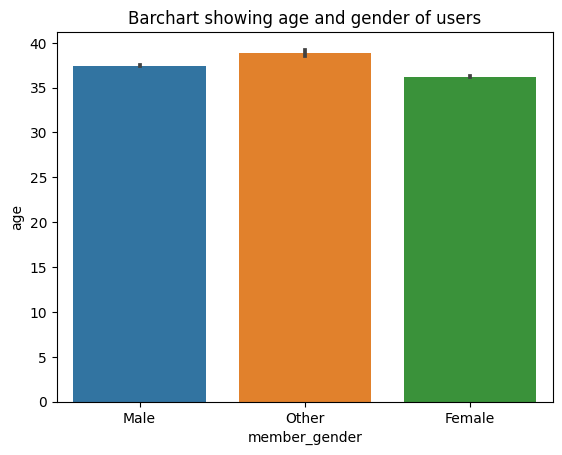

In [107]:
sns.barplot(x = 'member_gender', y = 'age', data = df1)
plt.title('Barchart showing age and gender of users')
plt.show()

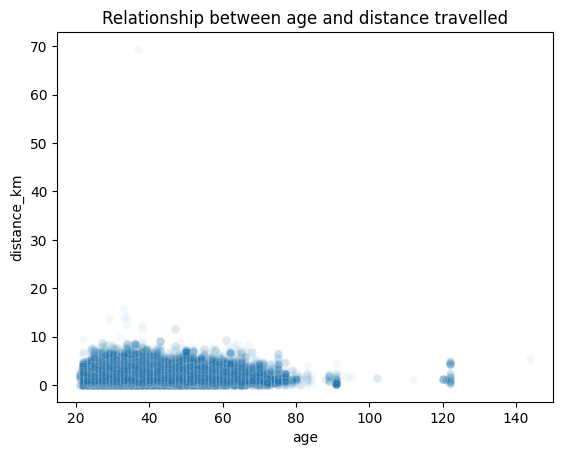

In [120]:
sns.scatterplot(x = 'age', y = 'distance_km', x_jitter = 0.3, alpha= 1/20, data = df1)
plt.title('Relationship between age and distance travelled')
plt.show()

The scatter plot above shows that there is no correlation between the age of a user and distance travelled by the user.

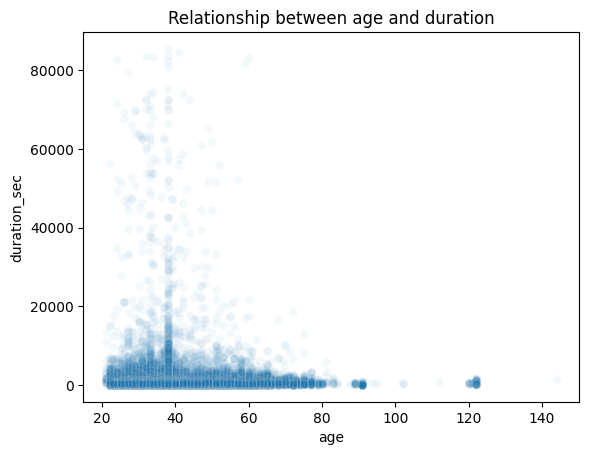

In [116]:
sns.scatterplot(x = 'age', y = 'duration_sec', x_jitter = 0.3, alpha= 1/20, data = df1)
plt.title('Relationship between age and duration')
plt.show()

The scatter plot above shows that there is no correlation between the age of a user and distance travelled by the user.

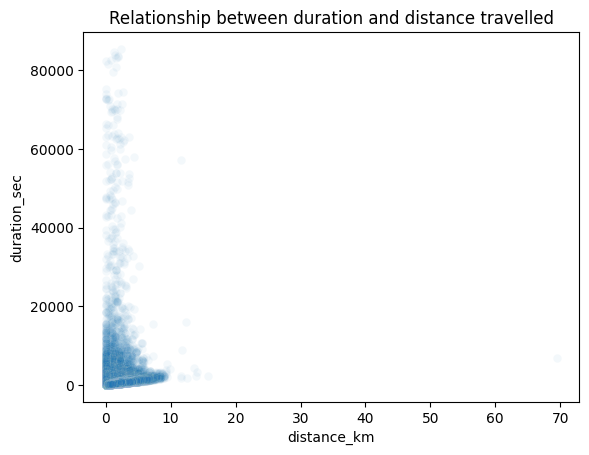

In [117]:
sns.scatterplot(x = 'distance_km', y = 'duration_sec', x_jitter = 0.3, alpha= 1/20, data = df1)
plt.title('Relationship between duration and distance travelled')
plt.show()

The scatter plot above shows that there is no correlation between the duration and distance travelled by the user.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? 

I observed that there was no relationship between the distance travelled by the user and the duration, i also observed that there was no relationship between the age of the users and distance travelled.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)? 

I did not observe any relationship.

# Multivariate Exploration

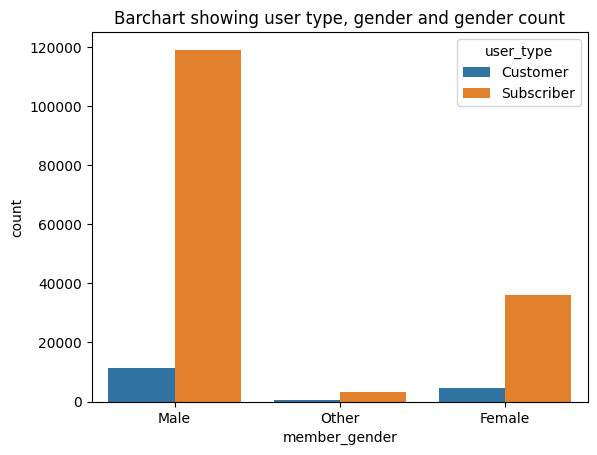

In [118]:
sns.countplot(x="member_gender", hue="user_type", data=df1)
plt.title('Barchart showing user type, gender and gender count')
plt.show()

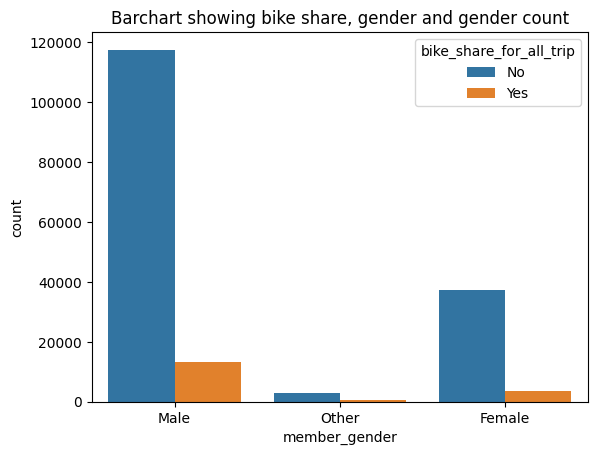

In [119]:
sns.countplot(x="member_gender", hue="bike_share_for_all_trip", data=df1)
plt.title('Barchart showing bike share, gender and gender count')
plt.show()

I observed that there a more male subscribers than female subscribers.

# Conclusions

The bike sharing system is popular amongst people in their late twenties and thirties. There arre more male users tha female usres. Locations that had more users and less users were also determined. It was also discovered that the age of a user had nothing to do with the time spent and distance travelled.